In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
from datetime import datetime

In [4]:
ebola=pd.read_csv('../data/country_timeseries.csv')

In [5]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN
3,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,NaN,NaN,NaN
4,12/31/2014,284,2730.0,8115.0,9633.0,NaN,NaN,NaN,NaN,NaN,1739.0,3471.0,2827.0,NaN,NaN,NaN,NaN,NaN


In [6]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali'],
      dtype='object')

In [7]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 122 non-null    object 
 1   Day                  122 non-null    int64  
 2   Cases_Guinea         93 non-null     float64
 3   Cases_Liberia        83 non-null     float64
 4   Cases_SierraLeone    87 non-null     float64
 5   Cases_Nigeria        38 non-null     float64
 6   Cases_Senegal        25 non-null     float64
 7   Cases_UnitedStates   18 non-null     float64
 8   Cases_Spain          16 non-null     float64
 9   Cases_Mali           12 non-null     float64
 10  Deaths_Guinea        92 non-null     float64
 11  Deaths_Liberia       81 non-null     float64
 12  Deaths_SierraLeone   87 non-null     float64
 13  Deaths_Nigeria       38 non-null     float64
 14  Deaths_Senegal       22 non-null     float64
 15  Deaths_UnitedStates  18 non-null     flo

In [8]:
### date is not codified as a datetime, this is not optimal

## Section, casting to datetime format

In [9]:
ebola['date_dt'] = pd.to_datetime(ebola['Date'])

In [10]:
ebola[['Date','Day','date_dt']].head()

,Date,Day,date_dt
0,1/5/2015,289,2015-01-05
1,1/4/2015,288,2015-01-04
2,1/3/2015,287,2015-01-03
3,1/2/2015,286,2015-01-02
4,12/31/2014,284,2014-12-31


In [11]:
ebola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 122 non-null    object        
 1   Day                  122 non-null    int64         
 2   Cases_Guinea         93 non-null     float64       
 3   Cases_Liberia        83 non-null     float64       
 4   Cases_SierraLeone    87 non-null     float64       
 5   Cases_Nigeria        38 non-null     float64       
 6   Cases_Senegal        25 non-null     float64       
 7   Cases_UnitedStates   18 non-null     float64       
 8   Cases_Spain          16 non-null     float64       
 9   Cases_Mali           12 non-null     float64       
 10  Deaths_Guinea        92 non-null     float64       
 11  Deaths_Liberia       81 non-null     float64       
 12  Deaths_SierraLeone   87 non-null     float64       
 13  Deaths_Nigeria       38 non-null   

## Once we have it in datetime64 format we apply time specific operations

## Section Extract time componentns

In [12]:
ebola['year'] = ebola['date_dt'].dt.year

In [13]:
ebola['month'] = ebola['date_dt'].dt.month

In [14]:
ebola['day'] = ebola['date_dt'].dt.day

In [15]:
ebola[['Date','Day','date_dt','year','month','day']].head()

,Date,Day,date_dt,year,month,day
0,1/5/2015,289,2015-01-05,2015,1,5
1,1/4/2015,288,2015-01-04,2015,1,4
2,1/3/2015,287,2015-01-03,2015,1,3
3,1/2/2015,286,2015-01-02,2015,1,2
4,12/31/2014,284,2014-12-31,2014,12,31


## Set as index
### in the case of panel data it is most convenient to define time based indexes

In [16]:
ebola.set_index('date_dt',inplace=True)

In [17]:
ebola.sort_index(inplace=True)

In [18]:
ebola.head()

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day
date_dt,,,,,,,,,,,,,,,,,,,,,
2014-03-22,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,22
2014-03-24,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,24
2014-03-25,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,25
2014-03-26,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,26
2014-03-27,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,...,6.0,5.0,NaN,NaN,NaN,NaN,NaN,2014,3,27


In [19]:
ebola.columns

Index(['Date', 'Day', 'Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali', 'Deaths_Guinea', 'Deaths_Liberia', 'Deaths_SierraLeone',
       'Deaths_Nigeria', 'Deaths_Senegal', 'Deaths_UnitedStates',
       'Deaths_Spain', 'Deaths_Mali', 'year', 'month', 'day'],
      dtype='object')

In [20]:
dataToPlot=ebola[['Cases_Guinea', 'Cases_Liberia', 'Cases_SierraLeone',
       'Cases_Nigeria', 'Cases_Senegal', 'Cases_UnitedStates', 'Cases_Spain',
       'Cases_Mali']]


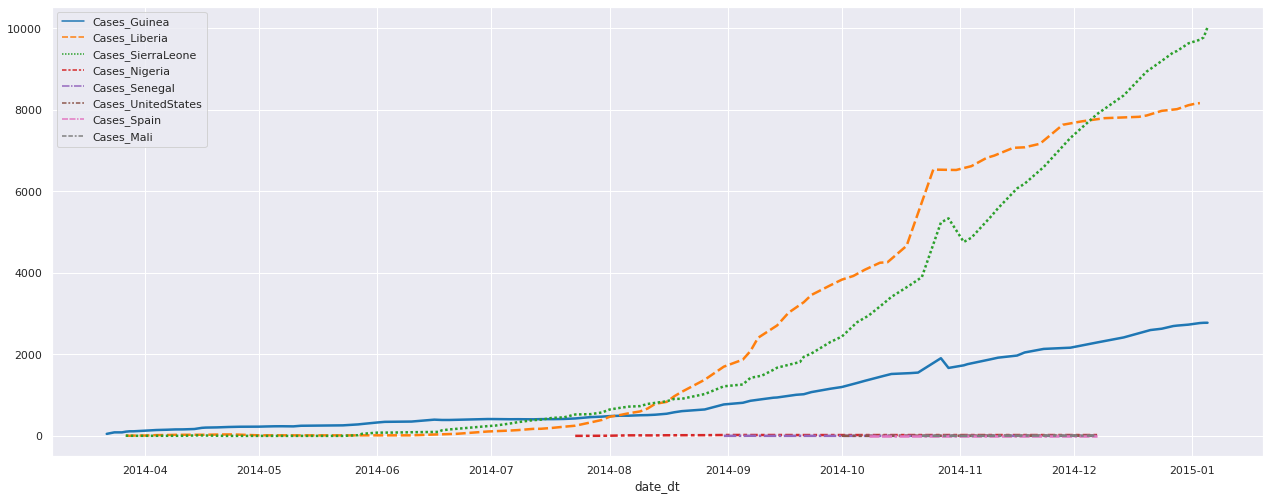

In [21]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.lineplot(data=dataToPlot, palette="tab10", linewidth=2.5)

### Slicing
### once we have time elements in the index it becomes straightforward to select time frames

In [22]:
ebola.loc['2014-04-01':'2014-04-10']

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day
date_dt,,,,,,,,,,,,,,,,,,,,,
2014-04-01,4/1/2014,10,127.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,...,5.0,2.0,NaN,NaN,NaN,NaN,NaN,2014,4,1
2014-04-04,4/4/2014,13,143.0,18.0,2.0,NaN,NaN,NaN,NaN,NaN,...,7.0,2.0,NaN,NaN,NaN,NaN,NaN,2014,4,4
2014-04-07,4/7/2014,16,151.0,21.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10.0,2.0,NaN,NaN,NaN,NaN,NaN,2014,4,7
2014-04-09,4/9/2014,18,158.0,25.0,2.0,NaN,NaN,NaN,NaN,NaN,...,12.0,2.0,NaN,NaN,NaN,NaN,NaN,2014,4,9


In [23]:
ebola.loc['2014-04-01':'2014-04-01']

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day
date_dt,,,,,,,,,,,,,,,,,,,,,
2014-04-01,4/1/2014,10,127.0,8.0,2.0,NaN,NaN,NaN,NaN,NaN,...,5.0,2.0,NaN,NaN,NaN,NaN,NaN,2014,4,1


In [24]:
ebola.loc['2014']

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day
date_dt,,,,,,,,,,,,,,,,,,,,,
2014-03-22,3/22/2014,0,49.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,22
2014-03-24,3/24/2014,2,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,24
2014-03-25,3/25/2014,3,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,25
2014-03-26,3/26/2014,4,86.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014,3,26
2014-03-27,3/27/2014,5,103.0,8.0,6.0,NaN,NaN,NaN,NaN,NaN,...,6.0,5.0,NaN,NaN,NaN,NaN,NaN,2014,3,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-12-21,12/21/2014,273,2597.0,NaN,9004.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2582.0,NaN,NaN,NaN,NaN,NaN,2014,12,21
2014-12-24,12/24/2014,277,2630.0,7977.0,9203.0,NaN,NaN,NaN,NaN,NaN,...,3413.0,2655.0,NaN,NaN,NaN,NaN,NaN,2014,12,24
2014-12-27,12/27/2014,280,2695.0,NaN,9409.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2732.0,NaN,NaN,NaN,NaN,NaN,2014,12,27


In [25]:
ebola.loc['2015']

,Date,Day,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,...,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali,year,month,day
date_dt,,,,,,,,,,,,,,,,,,,,,
2015-01-02,1/2/2015,286,NaN,8157.0,NaN,NaN,NaN,NaN,NaN,NaN,...,3496.0,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,2
2015-01-03,1/3/2015,287,2769.0,8166.0,9722.0,NaN,NaN,NaN,NaN,NaN,...,3496.0,2915.0,NaN,NaN,NaN,NaN,NaN,2015,1,3
2015-01-04,1/4/2015,288,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2943.0,NaN,NaN,NaN,NaN,NaN,2015,1,4
2015-01-05,1/5/2015,289,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,...,NaN,2977.0,NaN,NaN,NaN,NaN,NaN,2015,1,5


## Shifting operations
### It is a common operation to shift time series data. We may need to make a comparison between lagged or lead features. In our data frame, we can create a new feature that contains ebola cases of the previous day.

In [40]:
ebola[['Cases_Guinea']].loc['2014-04-01':'2014-04-15']

,Cases_Guinea
date_dt,
2014-04-01,127.0
2014-04-04,143.0
2014-04-07,151.0
2014-04-09,158.0
2014-04-11,159.0
2014-04-14,168.0
2014-04-15,NaN


In [41]:
ebola[['Cases_Guinea']].loc['2014-04-01':'2014-04-15'].shift(1)

,Cases_Guinea
date_dt,
2014-04-01,NaN
2014-04-04,127.0
2014-04-07,143.0
2014-04-09,151.0
2014-04-11,158.0
2014-04-14,159.0
2014-04-15,168.0


In [49]:
ebola['Cases_Guinea_Lag_15']=ebola[['Cases_Guinea']].shift(15)

In [50]:
ebola[['Cases_Guinea','Cases_Guinea_Lag_15']].head(20)

,Cases_Guinea,Cases_Guinea_Lag_15
date_dt,,
2014-03-22,49.0,NaN
2014-03-24,86.0,NaN
2014-03-25,86.0,NaN
2014-03-26,86.0,NaN
2014-03-27,103.0,NaN
2014-03-28,112.0,NaN
2014-03-29,112.0,NaN
2014-03-31,122.0,NaN
2014-04-01,127.0,NaN


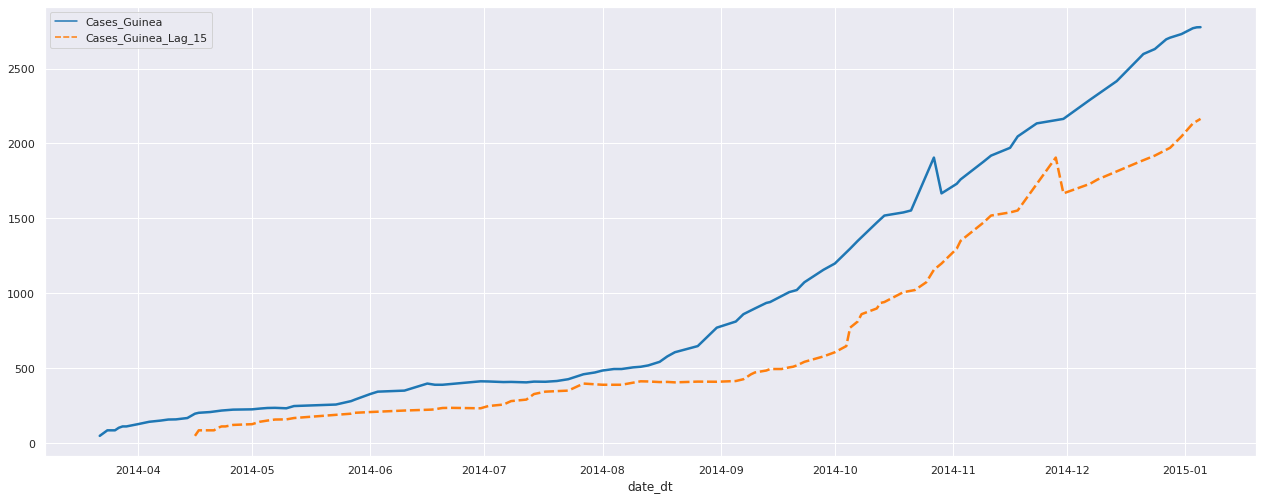

In [53]:
sns.set(rc={'figure.figsize':(21.7,8.27)})
sns.lineplot(data=ebola[['Cases_Guinea','Cases_Guinea_Lag_15']], palette="tab10", linewidth=2.5)